In [101]:
# Assignment 3
# Name: John Davis
# Reg No: 24-14-21
# Programme: M Tech Modeling and Simulation

In [102]:
import numpy as np
import matplotlib.pyplot as plt

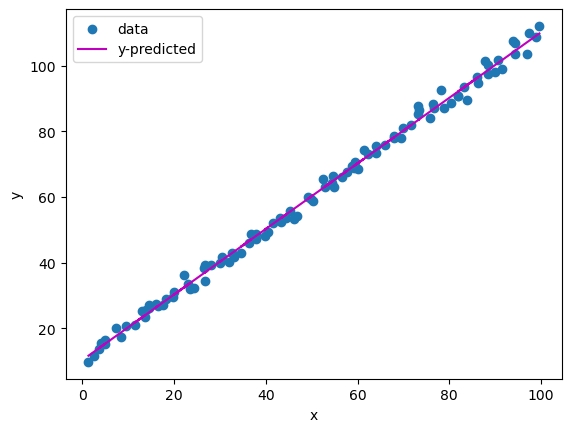

In [103]:
# Q1
# Create a function to find MLE values using Normal Equation and Plot graph on some generated test data.

def get_mle(X, Y):

    X_t = X.T
    X_t_X = np.dot(X_t, X)
    X_t_Y = np.dot(X_t, Y)

    theta = np.linalg.inv(X_t_X).dot(X_t_Y)
    return theta

# Test data
x = np.linspace(1,99,100).reshape(-1,1) + np.random.randn(100,1)  
y = x + 10 + np.random.randn(100,1) * 2
X = np.hstack((np.ones((100,1)), x))

theta = get_mle(X, y)

y_cap = X.dot(theta)

#Plotting points
plt.scatter(x, y, label="data")
plt.plot(x, y_cap, color='m', label='y-predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

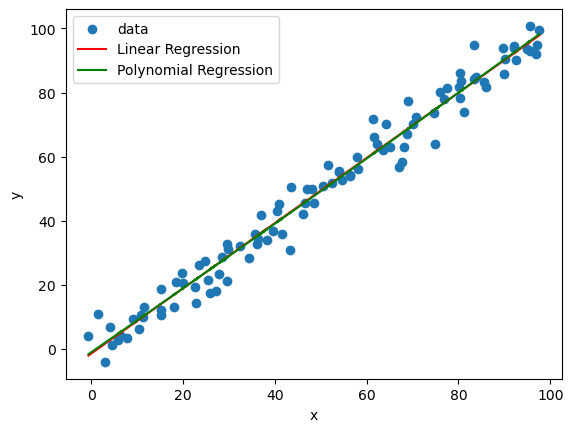

In [104]:
# Q2 
# Implement Polynomial regression and compare with above linear regression. Plot graph

def poly_regression(X, Y, degree=2):

    X_poly = np.zeros((X.shape[0], degree + 1))
    for i in range(degree + 1):
        X_poly[:, i] = np.power(X[:, 0], i)

    theta = get_mle(X_poly, y)
    return theta 

# Test data
x = np.linspace(1,99,100).reshape(-1,1) + np.random.randn(100,1)  
y = x + np.random.randn(100,1) * 5
X = np.hstack((np.ones((100,1)), x))

linear_theta = get_mle(X, y)
pred_linear = X.dot(linear_theta)

poly_theta = poly_regression(x, y)

X_poly = np.zeros((x.shape[0], 3))
for i in range(3):
    X_poly[:, i] = np.power(x[:, 0], i)
pred_poly = X_poly.dot(poly_theta)

# Plot
plt.scatter(x, y, label='data')
plt.plot(x, pred_linear, color='r', label='Linear Regression')
plt.plot(x, pred_poly, color='g', label='Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [105]:
# Q3
# Introduce outliers in data, Propose solution to detect and remove outliers. Implement solution.

### Outliers 
Outliers are data points which deviate significantly from the general trend. It can impact the performance of model by affecting the regression parameters leading to increased bias and reduced accuracy.

### Detection
#### Z score
By calculating Z score of each data point we can determine how much far the point is and data points outside a certain threshold can be regarded as outliers.
Z = (x - μ) / σ

### Removal
Outliers can be removed by  
a) by deletion   
b) by replacing outlier value with certain percentile of original point   
c) replace with nearest value within in a range.

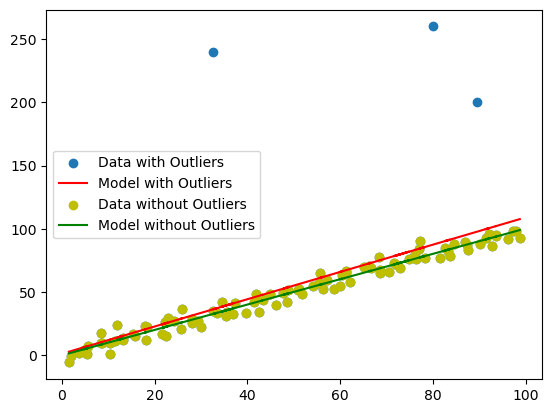

In [106]:
# using z score to determine outlier

def zscore(data, threshold=3):
    z_scores = (data - np.mean(data)) / np.std(data)
    outliers = np.where(np.abs(z_scores) > threshold)[0]
    return outliers

# Generate data with outliers
np.random.seed(42)
x = np.linspace(1,99,100) + np.random.randn(100)  
y = x  +  5 * np.random.randn(100)

y[80] = 260
y[32] = 240
y[89] = 200

outliers_zscore = zscore(y)

# removing outliers
y_clean = np.delete(y, outliers_zscore)
x_clean = np.delete(x, outliers_zscore)

model_with_outliers = np.polyfit(x, y, 1)
model_without_outliers = np.polyfit(x_clean, y_clean, 1)

# Plot the results
plt.scatter(x, y, label='Data with Outliers')
plt.plot(x, np.polyval(model_with_outliers, x), color='r', label='Model with Outliers')
plt.scatter(x_clean, y_clean, color = 'y', label='Data without Outliers')
plt.plot(x_clean, np.polyval(model_without_outliers, x_clean), color='g', label='Model without Outliers')
plt.legend()
plt.show()

Github
https://github.com/jdevassi/john_24-14-21/blob/main/Assn3_John_24-14-21.ipynb